In [1]:
%matplotlib notebook

In [2]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from config import api_key

In [3]:
#trying to find data from another year - There is not Census info for each year

c_2011 = Census(api_key, year=2011)
census_data = c_2011.acs5.get(("NAME", "B25064_001E", "B01003_001E", "B19013_001E", "B23025_005E", "B01002_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_2011 = pd.DataFrame(census_data)

# Column Reordering
census_2011 = census_2011.rename(columns={"B25064_001E": "Median Rent+Utilities 2011",
                                      "B01003_001E": "Total Population 2011",
                                      "B19013_001E": "Household Income 2011",
                                      "B23025_005E": "# Unemployed 2011",
                                      "B17001_002E": "Poverty Count 2011",
                                      "B01002_001E": "Median Age 2011",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
#add in unemployment rate
census_2011['Unemployment Rate 2011'] = census_2011['# Unemployed 2011'] / census_2011['Total Population 2011'] *100

#add in Poverty rate
census_2011['Poverty Rate 2011'] = census_2011['Poverty Count 2011'] / census_2011['Total Population 2011'] *100

# Final DataFrame
census_2011 = census_2011[["Zipcode", "Total Population 2011", "Household Income 2011",
                       "Median Rent+Utilities 2011", "# Unemployed 2011", "Unemployment Rate 2011",'Poverty Rate 2011']]

#drop negative values
census_2011 = census_2011.loc[census_2011["Median Rent+Utilities 2011"] > 0, :]

# Visualize
census_2011.head(10)

,Zipcode,Total Population 2011,Household Income 2011,Median Rent+Utilities 2011,# Unemployed 2011,Unemployment Rate 2011,Poverty Rate 2011
0,02368,32089.0,64696.0,1146.0,1896.0,5.908567,8.239584
1,02370,17515.0,63896.0,1025.0,1089.0,6.217528,5.418213
2,02375,9007.0,79595.0,1239.0,378.0,4.196736,3.641612
3,02379,6896.0,80729.0,873.0,352.0,5.104408,3.813805
4,02382,14430.0,74610.0,1019.0,603.0,4.178794,6.444906
5,02420,13831.0,146667.0,1875.0,259.0,1.872605,3.094498
6,02421,17298.0,130592.0,1888.0,411.0,2.375997,4.601688
7,02445,21110.0,108313.0,1719.0,432.0,2.046423,9.549976
8,02446,28601.0,79278.0,1716.0,893.0,3.122268,14.961015
9,02451,16662.0,75129.0,1573.0,486.0,2.916817,5.173449


In [4]:
#trying to find data from another year - There is not Census info for each year

c_2012 = Census(api_key, year=2012)
census_data = c_2012.acs5.get(("NAME", "B25064_001E", "B01003_001E", "B19013_001E", "B23025_005E", "B01002_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_2012 = pd.DataFrame(census_data)

# Column Reordering
census_2012 = census_2012.rename(columns={"B25064_001E": "Median Rent+Utilities 2012",
                                      "B01003_001E": "Total Population 2012",
                                      "B19013_001E": "Household Income 2012",
                                      "B23025_005E": "# Unemployed 2012",
                                      "B17001_002E": "Poverty Count 2012",
                                      "B01002_001E": "Median Age 2012",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

#add in unemployment rate
census_2012['Unemployment Rate 2012'] = census_2012['# Unemployed 2012'] / census_2012['Total Population 2012'] *100

#add in Poverty rate
census_2012['Poverty Rate 2012'] = census_2012['Poverty Count 2012'] / census_2012['Total Population 2012'] *100

# Final DataFrame
census_2012 = census_2012[["Zipcode", "Total Population 2012", "Household Income 2012",
                       "Median Rent+Utilities 2012", "# Unemployed 2012", "Unemployment Rate 2012", 'Poverty Rate 2012']]
 
#drop negative values
census_2012 = census_2012.loc[census_2012["Median Rent+Utilities 2012"] > 0, :]

# Visualize
print(len(census_2012))
census_2012.head(10)

28629


,Zipcode,Total Population 2012,Household Income 2012,Median Rent+Utilities 2012,# Unemployed 2012,Unemployment Rate 2012,Poverty Rate 2012
0,02322,4349.0,70481.0,1131.0,351.0,8.070821,1.425615
1,02324,26687.0,90722.0,1144.0,1290.0,4.833814,4.601491
2,02330,11497.0,67963.0,1547.0,625.0,5.436201,6.697399
3,02332,15040.0,117197.0,957.0,520.0,3.457447,3.583777
4,02333,13794.0,80169.0,993.0,446.0,3.233290,6.981296
5,02338,7524.0,77905.0,1229.0,362.0,4.811271,4.399256
6,02339,13902.0,99856.0,916.0,532.0,3.826788,2.949216
7,02341,10209.0,92736.0,1009.0,505.0,4.946616,2.448820
8,02343,10595.0,61825.0,1152.0,538.0,5.077867,7.777253
9,02346,23037.0,74764.0,1081.0,1190.0,5.165603,7.192777


In [5]:
#pulling data from 2013
c_2013 = Census(api_key, year=2013)
census_data = c_2013.acs5.get(("NAME", "B25064_001E", "B01003_001E", "B19013_001E", "B23025_005E", "B01002_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_2013 = pd.DataFrame(census_data)

# Column Reordering
census_2013 = census_2013.rename(columns={"B25064_001E": "Median Rent+Utilities 2013",
                                      "B01003_001E": "Total Population 2013",
                                      "B19013_001E": "Household Income 2013",
                                      "B23025_005E": "# Unemployed 2013",
                                      "B17001_002E": "Poverty Count 2013",
                                      "B01002_001E": "Median Age 2013",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

#add in unemployment rate
census_2013['Unemployment Rate 2013'] = census_2013['# Unemployed 2013'] / census_2013['Total Population 2013'] *100

#add in Poverty rate
census_2013['Poverty Rate 2013'] = census_2013['Poverty Count 2013'] / census_2013['Total Population 2013'] *100

# Final DataFrame
census_2013 = census_2013[["Zipcode", "Total Population 2013", "Household Income 2013",
                       "Median Rent+Utilities 2013", "# Unemployed 2013", "Unemployment Rate 2013", 'Poverty Rate 2013']]

#drop negative values
census_2013 = census_2013.loc[census_2013["Median Rent+Utilities 2013"] > 0, :]


# Visualize
print(len(census_2013))
census_2013.head(10)

27503


,Zipcode,Total Population 2013,Household Income 2013,Median Rent+Utilities 2013,# Unemployed 2013,Unemployment Rate 2013,Poverty Rate 2013
0,01832,22121.0,57833.0,922.0,1258.0,5.686904,10.903666
1,01833,8295.0,107775.0,1210.0,320.0,3.857746,2.302592
2,01834,6675.0,97463.0,1056.0,233.0,3.490637,2.187266
3,01835,13527.0,72228.0,1089.0,452.0,3.341465,8.523693
4,01840,4547.0,18261.0,682.0,255.0,5.608093,39.542556
5,01841,47676.0,31214.0,1000.0,3091.0,6.483346,30.065442
6,01843,24597.0,42891.0,1023.0,1259.0,5.118510,24.466398
7,01844,47690.0,67556.0,958.0,1920.0,4.026001,8.433634
8,01845,28677.0,96002.0,1310.0,1306.0,4.554172,5.227186
9,01850,15496.0,51538.0,975.0,1118.0,7.214765,19.972896


In [6]:
#pulling data from 2014
c_2014 = Census(api_key, year=2014)
census_data = c_2014.acs5.get(("NAME", "B25064_001E", "B01003_001E", "B19013_001E", "B23025_005E", "B01002_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_2014 = pd.DataFrame(census_data)

# Column Reordering
census_2014 = census_2014.rename(columns={"B25064_001E": "Median Rent+Utilities 2014",
                                      "B01003_001E": "Total Population 2014",
                                      "B19013_001E": "Household Income 2014",
                                      "B23025_005E": "# Unemployed 2014",
                                      "B17001_002E": "Poverty Count 2014",
                                      "B01002_001E": "Median Age 2014",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
#add in unemployment rate
census_2014['Unemployment Rate 2014'] = census_2014['# Unemployed 2014'] / census_2014['Total Population 2014'] *100

#add in Poverty rate
census_2014['Poverty Rate 2014'] = census_2014['Poverty Count 2014'] / census_2014['Total Population 2014'] *100

# Final DataFrame
census_2014 = census_2014[["Zipcode", "Total Population 2014", "Household Income 2014",
                       "Median Rent+Utilities 2014", "# Unemployed 2014", "Unemployment Rate 2014", 'Poverty Rate 2014']]


#drop negative values
census_2014 = census_2014.loc[census_2014["Median Rent+Utilities 2014"] > 0, :]

# Visualize
print(len(census_2014))
census_2014.head(10)

27738


,Zipcode,Total Population 2014,Household Income 2014,Median Rent+Utilities 2014,# Unemployed 2014,Unemployment Rate 2014,Poverty Rate 2014
0,01740,5019.0,144461.0,950.0,149.0,2.968719,2.669855
1,01741,4967.0,157500.0,2001.0,147.0,2.959533,5.496275
2,01742,18948.0,132736.0,1573.0,303.0,1.599113,4.417353
4,01746,14008.0,108350.0,971.0,535.0,3.819246,3.962022
5,01747,5934.0,99886.0,1089.0,170.0,2.864847,2.376138
6,01748,15604.0,128267.0,1363.0,412.0,2.640349,2.140477
7,01749,19464.0,74082.0,1151.0,636.0,3.267571,6.375873
8,01752,39141.0,71424.0,1142.0,1661.0,4.243632,7.291587
9,01754,10314.0,79252.0,1071.0,412.0,3.994570,9.327128
10,01756,5895.0,112104.0,1213.0,191.0,3.240034,1.916879


In [7]:
#pulling data from 2015
c_2015 = Census(api_key, year=2015)
census_data = c_2015.acs5.get(("NAME", "B25064_001E", "B01003_001E", "B19013_001E", "B23025_005E", "B01002_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_2015 = pd.DataFrame(census_data)

# Column Reordering
census_2015 = census_2015.rename(columns={"B25064_001E": "Median Rent+Utilities 2015",
                                      "B01003_001E": "Total Population 2015",
                                      "B19013_001E": "Household Income 2015",
                                      "B23025_005E": "# Unemployed 2015",
                                      "B17001_002E": "Poverty Count 2015",
                                      "B01002_001E": "Median Age 2015",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
#add in unemployment rate
census_2015['Unemployment Rate 2015'] = census_2015['# Unemployed 2015'] / census_2015['Total Population 2015'] *100

#add in Poverty rate
census_2015['Poverty Rate 2015'] = census_2015['Poverty Count 2015'] / census_2015['Total Population 2015'] *100

# Final DataFrame
census_2015 = census_2015[["Zipcode", "Total Population 2015", "Household Income 2015",
                       "Median Rent+Utilities 2015", "# Unemployed 2015", "Unemployment Rate 2015", 'Poverty Rate 2015']]


#drop negative values
census_2015 = census_2015.loc[census_2015["Median Rent+Utilities 2015"] > 0, :]


# Visualize
print(len(census_2015))
census_2015.head(10)

27431


,Zipcode,Total Population 2015,Household Income 2015,Median Rent+Utilities 2015,# Unemployed 2015,Unemployment Rate 2015,Poverty Rate 2015
1,65588,2772.0,33413.0,441.0,130.0,4.689755,24.963925
3,65590,1195.0,31298.0,491.0,37.0,3.096234,23.012552
4,65591,1837.0,47266.0,571.0,178.0,9.689711,14.534567
5,65601,652.0,41488.0,575.0,13.0,1.993865,11.196319
7,65604,4035.0,45918.0,642.0,81.0,2.007435,14.052045
8,65605,11728.0,36458.0,631.0,639.0,5.448499,18.425989
9,65606,3417.0,26662.0,471.0,73.0,2.136377,33.040679
10,65608,9474.0,29264.0,600.0,314.0,3.314334,22.757019
11,65609,721.0,33281.0,501.0,22.0,3.051318,17.198336
12,65610,5898.0,54158.0,542.0,266.0,4.510003,8.375721


In [8]:
## merge all years of data
merge_11_12= pd.merge(census_2011, census_2012, on="Zipcode", how="left")
merge_with_13 = pd.merge(merge_11_12, census_2013, on='Zipcode', how='left')
merge_with_14 = pd.merge(merge_with_13, census_2014, on='Zipcode', how='left')
all_data = pd.merge(merge_with_14, census_2015, on='Zipcode', how='left')
all_data=all_data.dropna(how='any')
all_data

,Zipcode,Total Population 2011,Household Income 2011,Median Rent+Utilities 2011,# Unemployed 2011,Unemployment Rate 2011,Poverty Rate 2011,Total Population 2012,Household Income 2012,Median Rent+Utilities 2012,...,Median Rent+Utilities 2014,# Unemployed 2014,Unemployment Rate 2014,Poverty Rate 2014,Total Population 2015,Household Income 2015,Median Rent+Utilities 2015,# Unemployed 2015,Unemployment Rate 2015,Poverty Rate 2015
0,02368,32089.0,64696.0,1146.0,1896.0,5.908567,8.239584,32577.0,62947.0,1202.0,...,1290.0,2812.0,8.453329,11.258079,33409.0,63681.0,1324.0,2664.0,7.973899,11.077853
1,02370,17515.0,63896.0,1025.0,1089.0,6.217528,5.418213,17518.0,64386.0,1036.0,...,1092.0,902.0,5.120345,5.205495,17663.0,69247.0,1159.0,651.0,3.685671,7.133556
2,02375,9007.0,79595.0,1239.0,378.0,4.196736,3.641612,9480.0,83370.0,1209.0,...,1142.0,423.0,4.366677,4.118922,9611.0,88090.0,1325.0,473.0,4.921444,3.766518
3,02379,6896.0,80729.0,873.0,352.0,5.104408,3.813805,6907.0,78207.0,890.0,...,1094.0,373.0,5.343074,3.939264,7008.0,81119.0,1022.0,323.0,4.609018,4.494863
4,02382,14430.0,74610.0,1019.0,603.0,4.178794,6.444906,14493.0,74371.0,1026.0,...,1083.0,697.0,4.759954,6.084819,14715.0,72490.0,989.0,592.0,4.023106,6.768603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28413,98644,458.0,37670.0,524.0,0.0,0.000000,10.698690,524.0,43024.0,925.0,...,921.0,0.0,0.000000,22.781065,353.0,38841.0,897.0,0.0,0.000000,20.679887
28414,98645,1182.0,54327.0,807.0,54.0,4.568528,12.013536,1337.0,52875.0,931.0,...,944.0,78.0,6.538139,14.165968,1359.0,58958.0,945.0,77.0,5.665931,10.448859
28416,98648,3505.0,51372.0,666.0,199.0,5.677603,10.042796,3098.0,52074.0,634.0,...,617.0,181.0,6.382228,17.489422,2668.0,51818.0,605.0,120.0,4.497751,17.691154
28417,98649,1038.0,49808.0,689.0,41.0,3.949904,11.849711,1000.0,53542.0,690.0,...,740.0,19.0,1.607445,3.384095,1026.0,58824.0,783.0,10.0,0.974659,4.678363


In [9]:
#rent costs dataframe
rent_costs_year = all_data[['Zipcode', 'Median Rent+Utilities 2011', 'Median Rent+Utilities 2012', 'Median Rent+Utilities 2013', 'Median Rent+Utilities 2014', 'Median Rent+Utilities 2015']]
rent_cost_compare = pd.DataFrame(rent_costs_year)
rent_cost_compare.set_index(['Zipcode'])
rent_cost_compare

,Zipcode,Median Rent+Utilities 2011,Median Rent+Utilities 2012,Median Rent+Utilities 2013,Median Rent+Utilities 2014,Median Rent+Utilities 2015
0,02368,1146.0,1202.0,1228.0,1290.0,1324.0
1,02370,1025.0,1036.0,1075.0,1092.0,1159.0
2,02375,1239.0,1209.0,1162.0,1142.0,1325.0
3,02379,873.0,890.0,943.0,1094.0,1022.0
4,02382,1019.0,1026.0,979.0,1083.0,989.0
...,...,...,...,...,...,...
28413,98644,524.0,925.0,927.0,921.0,897.0
28414,98645,807.0,931.0,896.0,944.0,945.0
28416,98648,666.0,634.0,690.0,617.0,605.0
28417,98649,689.0,690.0,929.0,740.0,783.0


In [10]:
# unemployment rate
unemp_pct_years = all_data[['Zipcode', 'Unemployment Rate 2011', 'Unemployment Rate 2012', 'Unemployment Rate 2013', 'Unemployment Rate 2014', 'Unemployment Rate 2015']]
unempployment_rate = pd.DataFrame(unemp_pct_years)
unempployment_rate.set_index(['Zipcode'])
unempployment_rate

,Zipcode,Unemployment Rate 2011,Unemployment Rate 2012,Unemployment Rate 2013,Unemployment Rate 2014,Unemployment Rate 2015
0,02368,5.908567,6.612027,7.450231,8.453329,7.973899
1,02370,6.217528,5.400160,5.602417,5.120345,3.685671
2,02375,4.196736,4.767932,4.840842,4.366677,4.921444
3,02379,5.104408,4.864630,5.903580,5.343074,4.609018
4,02382,4.178794,4.712620,4.496465,4.759954,4.023106
...,...,...,...,...,...,...
28413,98644,0.000000,0.000000,0.000000,0.000000,0.000000
28414,98645,4.568528,6.881077,8.463950,6.538139,5.665931
28416,98648,5.677603,5.907037,6.260518,6.382228,4.497751
28417,98649,3.949904,3.000000,2.566540,1.607445,0.974659


In [11]:
# income
household_income_years = all_data[['Zipcode', 'Household Income 2011', 'Household Income 2012', 
                            'Household Income 2013', 'Household Income 2014', 'Household Income 2015']]
household_income = pd.DataFrame(household_income_years)
household_income.set_index(['Zipcode'])
household_income

,Zipcode,Household Income 2011,Household Income 2012,Household Income 2013,Household Income 2014,Household Income 2015
0,02368,64696.0,62947.0,62152.0,63325.0,63681.0
1,02370,63896.0,64386.0,66329.0,66860.0,69247.0
2,02375,79595.0,83370.0,86689.0,86695.0,88090.0
3,02379,80729.0,78207.0,80347.0,81573.0,81119.0
4,02382,74610.0,74371.0,72462.0,76494.0,72490.0
...,...,...,...,...,...,...
28413,98644,37670.0,43024.0,42981.0,38641.0,38841.0
28414,98645,54327.0,52875.0,55903.0,54792.0,58958.0
28416,98648,51372.0,52074.0,53009.0,51471.0,51818.0
28417,98649,49808.0,53542.0,67589.0,72045.0,58824.0


In [12]:
#povery rate table
poverty_data = all_data[["Zipcode", "Poverty Rate 2011", "Poverty Rate 2012", "Poverty Rate 2013", "Poverty Rate 2014", "Poverty Rate 2015"]]
poverty_data

,Zipcode,Poverty Rate 2011,Poverty Rate 2012,Poverty Rate 2013,Poverty Rate 2014,Poverty Rate 2015
0,02368,8.239584,9.340946,10.673100,11.258079,11.077853
1,02370,5.418213,5.839708,5.608116,5.205495,7.133556
2,02375,3.641612,3.069620,4.118784,4.118922,3.766518
3,02379,3.813805,5.125235,3.781755,3.939264,4.494863
4,02382,6.444906,6.892983,7.736665,6.084819,6.768603
...,...,...,...,...,...,...
28413,98644,10.698690,19.656489,19.589977,22.781065,20.679887
28414,98645,12.013536,12.266268,11.755486,14.165968,10.448859
28416,98648,10.042796,14.428664,14.203972,17.489422,17.691154
28417,98649,11.849711,12.900000,11.216730,3.384095,4.678363


In [13]:
#get lats and longs
cities_info_df = pd.read_csv("zips_lats_longs.csv", sep=";", dtype="object", encoding="utf-8")
cities_info_df = cities_info_df.rename(columns={"Zip": "Zipcode"})
cities_info_df = cities_info_df.loc[:, ["Zipcode", "City", "State", "Latitude", "Longitude"]]
# Visualize
cities_info_df.head()

,Zipcode,City,State,Latitude,Longitude
0,71937,Cove,AR,34.398483,-94.39398
1,72044,Edgemont,AR,35.624351,-92.16056
2,56171,Sherburn,MN,43.660847,-94.74357
3,49430,Lamont,MI,43.010337,-85.89754
4,52585,Richland,IA,41.194129,-91.98027


In [14]:
#merge zips with lats and longs
ziplatlong = pd.merge(all_data, cities_info_df, on='Zipcode', how='left')
ziplatlong

,Zipcode,Total Population 2011,Household Income 2011,Median Rent+Utilities 2011,# Unemployed 2011,Unemployment Rate 2011,Poverty Rate 2011,Total Population 2012,Household Income 2012,Median Rent+Utilities 2012,...,Total Population 2015,Household Income 2015,Median Rent+Utilities 2015,# Unemployed 2015,Unemployment Rate 2015,Poverty Rate 2015,City,State,Latitude,Longitude
0,02368,32089.0,64696.0,1146.0,1896.0,5.908567,8.239584,32577.0,62947.0,1202.0,...,33409.0,63681.0,1324.0,2664.0,7.973899,11.077853,Randolph,MA,42.173417,-71.04912
1,02370,17515.0,63896.0,1025.0,1089.0,6.217528,5.418213,17518.0,64386.0,1036.0,...,17663.0,69247.0,1159.0,651.0,3.685671,7.133556,Rockland,MA,42.129513,-70.91189
2,02375,9007.0,79595.0,1239.0,378.0,4.196736,3.641612,9480.0,83370.0,1209.0,...,9611.0,88090.0,1325.0,473.0,4.921444,3.766518,South Easton,MA,42.029749,-71.10191
3,02379,6896.0,80729.0,873.0,352.0,5.104408,3.813805,6907.0,78207.0,890.0,...,7008.0,81119.0,1022.0,323.0,4.609018,4.494863,West Bridgewater,MA,42.02195,-71.01878
4,02382,14430.0,74610.0,1019.0,603.0,4.178794,6.444906,14493.0,74371.0,1026.0,...,14715.0,72490.0,989.0,592.0,4.023106,6.768603,Whitman,MA,42.08235,-70.93734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26185,98644,458.0,37670.0,524.0,0.0,0.000000,10.698690,524.0,43024.0,925.0,...,353.0,38841.0,897.0,0.0,0.000000,20.679887,Seaview,WA,46.332077,-124.05517
26186,98645,1182.0,54327.0,807.0,54.0,4.568528,12.013536,1337.0,52875.0,931.0,...,1359.0,58958.0,945.0,77.0,5.665931,10.448859,Silverlake,WA,46.318482,-122.7757
26187,98648,3505.0,51372.0,666.0,199.0,5.677603,10.042796,3098.0,52074.0,634.0,...,2668.0,51818.0,605.0,120.0,4.497751,17.691154,Stevenson,WA,45.669604,-121.91332
26188,98649,1038.0,49808.0,689.0,41.0,3.949904,11.849711,1000.0,53542.0,690.0,...,1026.0,58824.0,783.0,10.0,0.974659,4.678363,Toutle,WA,46.352771,-122.66054


In [15]:
# define poverty levels each year
poverty_years = 2011, 2012, 2013, 2014, 2015
poverty_levels = 10890, 11170, 11490, 11670, 11770


<IPython.core.display.Javascript object>


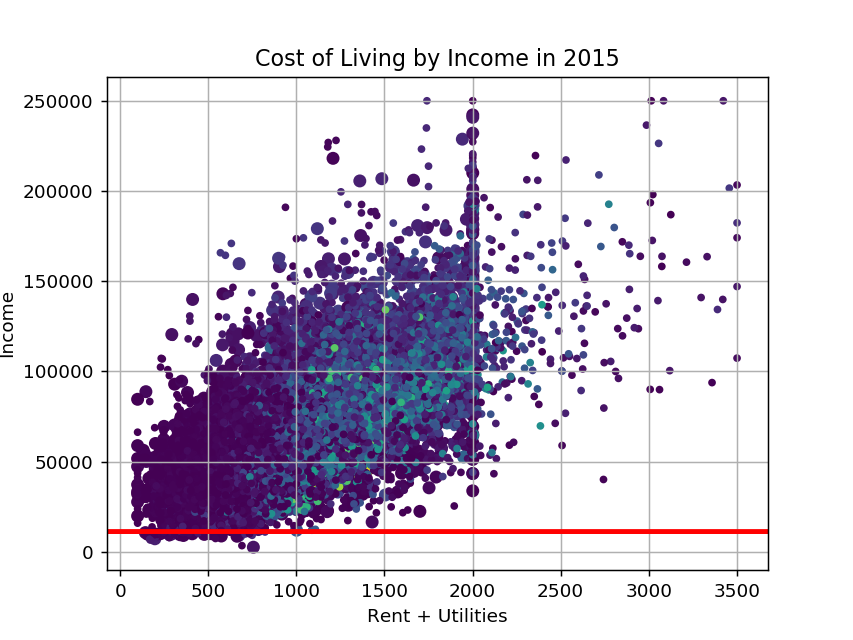

In [52]:
# plot rent v income 2011
col_by_income2011 = plt.scatter(ziplatlong["Median Rent+Utilities 2011"], ziplatlong["Household Income 2011"], marker="o", c=ziplatlong["Total Population 2011"])
plt.title("Cost of Living by Income in 2011")
plt.ylabel("Income")
plt.xlabel("Rent + Utilities")
plt.grid(True)
# x coordinates for the lines
plt.axhline(y=10890, color='r', linestyle='-')





In [53]:
# plot rent v income 2012
col_by_income2012 = plt.scatter(ziplatlong["Median Rent+Utilities 2012"], ziplatlong["Household Income 2012"],c=ziplatlong["Total Population 2012"], marker="o", s=10)
plt.title("Cost of Living by Income in 2012")
plt.ylabel("Income")
plt.xlabel("Rent + Utilities")
plt.grid(True)

plt.axhline(y=11170, color='r', linestyle='-')

In [55]:
# plot rent v income 2013
col_by_income2013 = plt.scatter(ziplatlong["Median Rent+Utilities 2013"], ziplatlong["Household Income 2013"],c=ziplatlong["Total Population 2013"], marker="o", s=10)
plt.title("Cost of Living by Income in 2013")
plt.ylabel("Income")
plt.xlabel("Rent + Utilities")
plt.grid(True)
plt.axhline(y=11670, color='r', linestyle='-')          

In [49]:
# plot rent v income 2014
col_by_income2014 = plt.scatter(ziplatlong["Median Rent+Utilities 2014"], ziplatlong["Household Income 2014"],c=ziplatlong["Total Population 2014"], marker="o", s=10)
plt.title("Cost of Living by Income in 2014")
plt.ylabel("Income")
plt.xlabel("Rent + Utilities")
           
plt.grid(True)

In [56]:
# plot rent v income 2015
col_by_income2015 = plt.scatter(ziplatlong["Median Rent+Utilities 2015"], ziplatlong["Household Income 2015"],c=ziplatlong["Total Population 2015"], marker="o", s=10)
plt.title("Cost of Living by Income in 2015")
plt.ylabel("Income")
plt.xlabel("Rent + Utilities")
plt.grid(True)
plt.axhline(y=11770, color='r', linestyle='-')
